# Scenario

The director of marketing believes the company's future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand **how casual riders and annual members use Cyclistic bikes differently**. Your team will design a new marketing strategy to **convert casual riders into annual members** from these insights.

# ASk

## A clear statement of the business task

The financial analysts have concluded that annual membership is much more profitable than single-ride and full-day passes from their analysis. So to make people opt for the yearly membership, our marketing campaign should urge the casual riders to convert to annual riders. As a solution, we should understand why casual riders would convert to a yearly membership? Based on the insights from the above question, we can achieve the maximum required conversion rate from casual to annual riders.

# PREPARE

## Guiding questions

**1) Where is your data located?**

Data is uploaded in RStudio cloud and also in my local machine where I could use the R programming language for the analysis.

**2) How is data organized?**

Data is segregated into quarters from the year 2013 to 2020 till the first quarter of the latter year. Each year having its CSV file.

**3) Are there any issues with bias or credibility in this data? Does your data ROCCC?**

The data has been collected directly from the company's customers, that is, bike riders so there is no issue of bias and credibility for the same reason. It is also Reliable, Original, Comprehensive, Current, and Cited, which satisfies ROCCC.

**4) How are you accessing licensing, privacy, security, and accessibility?**

The data was collected by Motivate International Inc. under the following license [link](https://www.divvybikes.com/data-license-agreement) Also the dataset does not contain any personal information about its customers (or riders) to violate the privacy.

**5) How did you verify the data's integrity?**

The qualities required to verify the data integrity are accuracy, completeness, consistency, and trustworthiness. The data is complete as it contains all the required components to measure the entity. The data is consistent across the years with every year having its CSV file which is organized in an equal number of columns and same data types. As the credibility was proven before, it is also trustworthy.

**6) How does it help to answer your question?**

By creating new features from existing ones like `rideable_type`, `started_at`, and `ended_at`(which are date-timestamp variables), we can deduce relationship between annual members and casual riders. The relationship analyzed will be useful to answer the question, that is, convert casual riders to annual members

**7) Are there any problems with the data?**

Yes, the data had a couple of problems. There are few rows with 'N/A' values which needs to be removed. Also, there are duplicates which have to be eliminated.

# PROCESS

## Guiding questions

**1)What tools are you choosing and why?**

The entries in the trips tables from the years 2004 to 2020 are enormous. Since this is the case it is always easy and helpful to navigate through the data using either databases or R programming language. I'm using R language to deal with the data in this case study.

**2) Have you ensured your data's integrity?**

The qualities required to verify the data integrity are accuracy, completeness, consistency, and trustworthiness. The data is complete as it contains all the required components to measure the entity. The data is consistent across the years with every year having its CSV file which is organized in an equal number of columns and same data types. As the credibility was proven before, it is also trustworthy.

**3) What steps have you taken to ensure that your data is clean?**

a)  I have concatenated all the CSV files of each year into a single data frame

b)  Removed all the empty rows and columns from the concatenated data frame.

c)  Checked the unique values in each variable using `count()` so that there is no misspelling anywhere.

d)  Omitted `N/A` values from the entire data frame.

e)  Removed duplicates

**4) How can you verify that your data is clean and ready to analyze?**

After performing all the cleaning tasks mentioned above, I ran the below functions to verify: a) Used `filter()` to check if there were any missing values

b)  Used `count()` to check the unique values of each variable

c)  Used `duplicated()` to check for any duplicates present.

**5) Have you documented your cleaning process so you can review and share those results?** Yes, please find the below comments and snippets for the documentation.

1. Install and load all the required packages.


In [4]:
# Install required packages
install.packages(c("tidyverse", "lubridate", "ggplot2", "janitor", "scales", "dplyr"))


Installing packages into ‘/home/saul/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



In [3]:
library("dplyr")
library("tidyverse")
library("lubridate")
library("ggplot2")
library("janitor")
library("scales")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.1     ✔ stringr   1.5.0
✔ lubridate 1.9.2     ✔ tibble    3.1.8
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




Loading all the csv files of last 12 months

In [6]:

    df1 <- read.csv("./data_set/202004-divvy-tripdata.csv")
    df2 <- read.csv("./data_set/202005-divvy-tripdata.csv")
    df3 <- read.csv("./data_set/202006-divvy-tripdata.csv")
    df4 <- read.csv("./data_set/202007-divvy-tripdata.csv")
    df5 <- read.csv("./data_set/202008-divvy-tripdata.csv")
    df6 <- read.csv("./data_set/202009-divvy-tripdata.csv")
    df7 <- read.csv("./data_set/202010-divvy-tripdata.csv")
    df8 <- read.csv("./data_set/202011-divvy-tripdata.csv")
    df9 <- read.csv("./data_set/202012-divvy-tripdata.csv")
    df10 <- read.csv("./data_set/202101-divvy-tripdata.csv")
    df11 <- read.csv("./data_set/202102-divvy-tripdata.csv")
    df12 <- read.csv("./data_set/202103-divvy-tripdata.csv")


 Concatenating all the CSVs into a single dataframe

In [7]:
bike_rides <- rbind(df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12)

2) Removing any empty rows or columns present and checking for missing values (Check the missing values for each variable)

In [8]:
new_binded_df <- remove_empty(bike_rides, which=c("rows", "cols"))
count(filter(new_binded_df, start_station_name==''),start_station_name, member_casual,sort=TRUE)

start_station_name,member_casual,n
<chr>,<chr>,<int>
,member,75659
,casual,46516


3) count() returns unique values of the variable passed.

In [9]:
bike_rides %>% 
  count(rideable_type)

rideable_type,n
<chr>,<int>
classic_bike,319873
docked_bike,2558469
electric_bike,611406


4)  omitting NA values in the entire data frame

In [10]:
new_binded_df <- na.omit(bike_rides)

5)  Removing duplicates

In [11]:
new_binded_df_no_dups <- new_binded_df[!duplicated(new_binded_df$ride_id), ]

# Analyze

## Guiding Questions

**1) How should you organize your data to perform analysis on it?**

Since the data sources contain separate CSV files for all the years and their respective quarters, after downloading them, I combined them into a single data frame. This combination was possible because all the CSV files had the same number and type of variables.

Also I created new features using the existing ones. Check them below:

**a) riding_time**

In [12]:
clean_df <- new_binded_df_no_dups %>%
  mutate(started_at = as.POSIXct(started_at, format = "%Y-%m-%d %H:%M:%S"),
         ended_at = as.POSIXct(ended_at, format = "%Y-%m-%d %H:%M:%S"),
         riding_time = as.numeric(ended_at - started_at)/60)

**b) year_month**

In [13]:
clean_df <- clean_df %>% 
  mutate(year_month=paste(strftime(clean_df$started_at, "%Y"), "-",
                          strftime(clean_df$started_at, "%m"), "-",
                          strftime(clean_df$started_at, "%b")))
clean_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_time,year_month
,<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,2020 - 04 - Apr
2,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,2020 - 04 - Apr
3,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,2020 - 04 - Apr
4,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,2020 - 04 - Apr
5,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,2020 - 04 - Apr
6,356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,5.400000,2020 - 04 - Apr
7,A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635,41.8923,-87.6120,41.8957,-87.6201,member,5.216667,2020 - 04 - Apr
8,FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382,41.8665,-87.6847,41.8747,-87.6864,casual,75.816667,2020 - 04 - Apr
9,9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359,41.8949,-87.6323,41.9035,-87.6434,casual,5.733333,2020 - 04 - Apr


Removing year_month with "2021 - 06 (Jun)" values from the data frame as June's month contains very few rows which are not helpful in our analysis.

In [14]:
clean_df <- filter(clean_df, year_month!="2021 - 06 (Jun)")
clean_df

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_time,year_month
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,2020 - 04 - Apr
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,2020 - 04 - Apr
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,2020 - 04 - Apr
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,2020 - 04 - Apr
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,2020 - 04 - Apr
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,5.400000,2020 - 04 - Apr
A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635,41.8923,-87.6120,41.8957,-87.6201,member,5.216667,2020 - 04 - Apr
FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382,41.8665,-87.6847,41.8747,-87.6864,casual,75.816667,2020 - 04 - Apr
9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359,41.8949,-87.6323,41.9035,-87.6434,casual,5.733333,2020 - 04 - Apr


**c) Weekday**

In [17]:
clean_df <- clean_df %>% 
  mutate(weekday=strftime(clean_df$ended_at, "%a"))
clean_df


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_time,year_month,weekday
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,2020 - 04 - Apr,So
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,2020 - 04 - Apr,Fr
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,2020 - 04 - Apr,Mi
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,2020 - 04 - Apr,Di
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,2020 - 04 - Apr,Sa
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,5.400000,2020 - 04 - Apr,Do
A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635,41.8923,-87.6120,41.8957,-87.6201,member,5.216667,2020 - 04 - Apr,Do
FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382,41.8665,-87.6847,41.8747,-87.6864,casual,75.816667,2020 - 04 - Apr,Di
9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359,41.8949,-87.6323,41.9035,-87.6434,casual,5.733333,2020 - 04 - Apr,Mi


**d) start_hour**

In [20]:
clean_df <- clean_df %>% 
  mutate(start_hour=strftime(clean_df$ended_at, format = "%H",tz = "UTC"))
clean_df

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,riding_time,year_month,weekday,start_hour
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.8964,-87.6610,41.9322,-87.6586,member,26.816667,2020 - 04 - Apr,So,16
5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.9244,-87.7154,41.9306,-87.7238,member,8.150000,2020 - 04 - Apr,Fr,15
5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.8945,-87.6179,41.8679,-87.6230,member,14.383333,2020 - 04 - Apr,Mi,16
2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.9030,-87.6975,41.8992,-87.6722,member,12.200000,2020 - 04 - Apr,Di,11
27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323,41.8902,-87.6262,41.9695,-87.6547,casual,52.916667,2020 - 04 - Apr,Sa,09
356216E875132F61,docked_bike,2020-04-30 17:55:47,2020-04-30 18:01:11,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.8969,-87.6217,41.8923,-87.6120,member,5.400000,2020 - 04 - Apr,Do,16
A2759CB06A81F2BC,docked_bike,2020-04-02 14:47:19,2020-04-02 14:52:32,Streeter Dr & Grand Ave,35,Fairbanks St & Superior St,635,41.8923,-87.6120,41.8957,-87.6201,member,5.216667,2020 - 04 - Apr,Do,12
FC8BC2E2D54F35ED,docked_bike,2020-04-07 12:22:20,2020-04-07 13:38:09,Ogden Ave & Roosevelt Rd,434,Western Ave & Congress Pkwy,382,41.8665,-87.6847,41.8747,-87.6864,casual,75.816667,2020 - 04 - Apr,Di,11
9EC5648678DE06E6,docked_bike,2020-04-15 10:30:11,2020-04-15 10:35:55,LaSalle Dr & Huron St,627,Larrabee St & Division St,359,41.8949,-87.6323,41.9035,-87.6434,casual,5.733333,2020 - 04 - Apr,Mi,08


**2) Has your data been properly formatted?**
Yes, the data has been properly formatted with respective to their values.
**3) What surprises did you discover in the data?**

Surprisingly, I found many NA values in the information about station names and ids (combined). Maybe while collecting the data, customers were not sure about the station's id numbers. However, the NA values in these fields will not affect our analysis.

**4) What trends or relationships did you find in the data?**

Let's compare the `member_casual` feature with other newly created features to find any trends:

**a) Let's start by comparing the number of members and casual riders**

In [21]:
df <- clean_df
df %>% 
  group_by(member_casual) %>% 
  summarize(count=length(ride_id),
            percentage_of_total=(length(ride_id)/nrow(df))*100)

member_casual,count,percentage_of_total
<chr>,<int>,<dbl>
casual,1369853,40.83864
member,1984453,59.16136


From above, it is known that 59% of the total riders in the last 12 months were annual members. The remaining(41%) are casual riders.

Let's plot the above table.

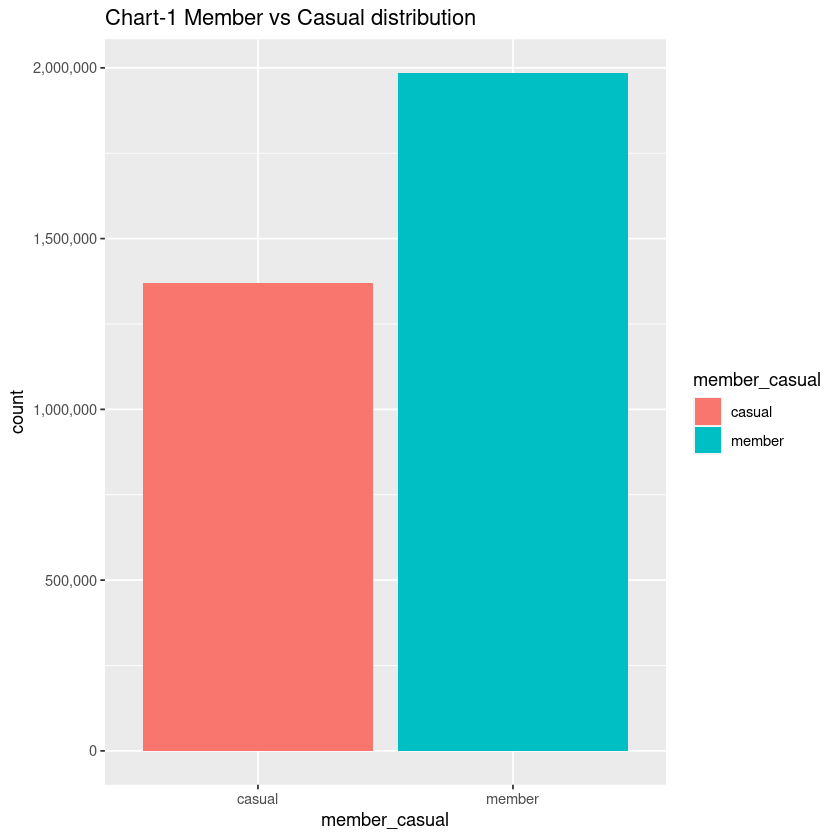

In [22]:
ggplot(df, aes(member_casual, fill=member_casual))+
  geom_bar()+
  labs(title="Chart-1 Member vs Casual distribution")+
  scale_y_continuous(labels=comma)

**b) Let's check what percent of annual and casual riders ride every month**

In [23]:
df %>% 
  group_by(year_month) %>%
  summarize(count=length(ride_id),
            percentage_of_total=(length(ride_id)/nrow(df))*100,
            members_count=sum(member_casual=="member"),
            members_percent=(sum(member_casual=="member")/length(ride_id))*100,
            casual_count=sum(member_casual=="casual"),
            casual_percent=(sum(member_casual=="casual")/length(ride_id))*100) %>% 
  arrange(year_month)

year_month,count,percentage_of_total,members_count,members_percent,casual_count,casual_percent
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
2020 - 04 - Apr,84677,2.524427,61089,72.14356,23588,27.85644
2020 - 05 - Mai,199953,5.961084,113190,56.60830,86763,43.39170
2020 - 06 - Jun,342537,10.211859,188028,54.89276,154509,45.10724
2020 - 07 - Jul,550425,16.409505,281692,51.17718,268733,48.82282
2020 - 08 - Aug,608510,18.141159,325504,53.49197,283006,46.50803
2020 - 09 - Sep,500390,14.917840,285090,56.97356,215300,43.02644
2020 - 10 - Okt,339303,10.115446,216493,63.80521,122810,36.19479
2020 - 11 - Nov,222789,6.641881,149756,67.21876,73033,32.78124
2020 - 12 - Dez,131254,3.913000,101234,77.12832,30020,22.87168


As can be seen, August had a more number of riders than any other month. However, the percentage of annual members every month is more than the casual riders', which is a good thing. Our goal here would be to maximize the percent of members every month. Also, the number of riders started decreasing drastically in the peak winter months (November-February)

Let's plot the above table.

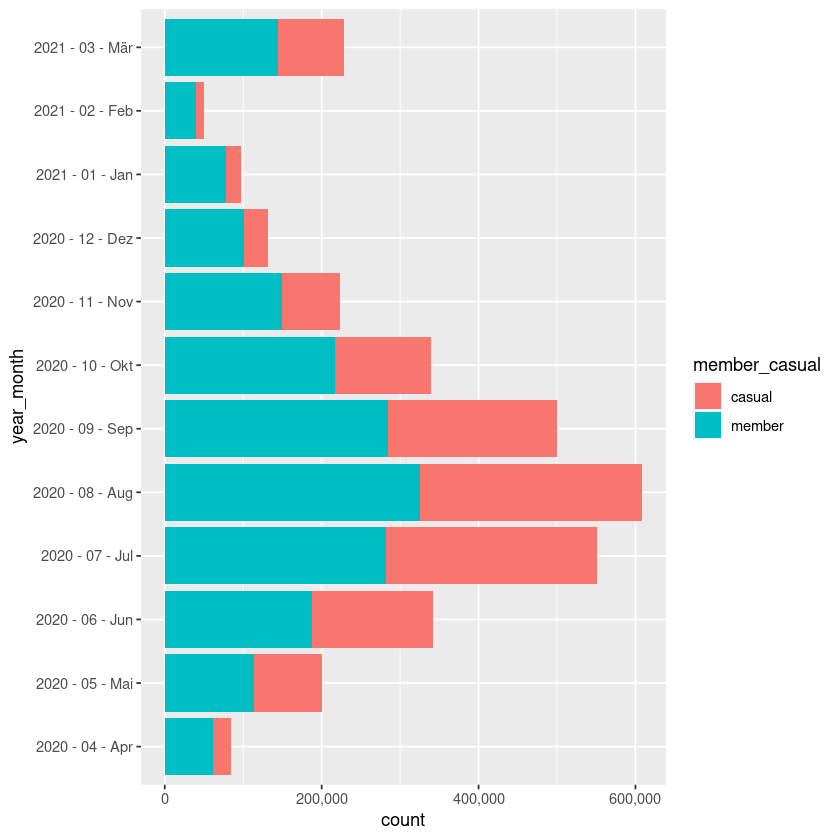

In [24]:
ggplot(df, aes(year_month, fill=member_casual))+
  geom_bar()+
  coord_flip()+
  scale_y_continuous(labels=comma)

**c) Let's now check how riders ride in each hour of the day. Also, later we'll check how this varies per each day of the week**

In [25]:
start_hour_df <- df %>% 
  group_by(start_hour) %>%
  summarize(count=length(ride_id),
            percentage_of_total=(length(ride_id)/nrow(df))*100,
            members_count=sum(member_casual=="member"),
            members_percent=(sum(member_casual=="member")/length(ride_id))*100,
            casual_count=sum(member_casual=="casual"),
            casual_percent=(sum(member_casual=="casual")/length(ride_id))*100) %>% 
  arrange(start_hour)
start_hour_df

start_hour,count,percentage_of_total,members_count,members_percent,casual_count,casual_percent
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
00,16600,0.4948863,4782,28.80723,11818,71.19277
01,9134,0.2723067,2617,28.65119,6517,71.34881
02,6679,0.1991172,2531,37.89489,4148,62.10511
03,13714,0.4088476,9682,70.59939,4032,29.40061
04,45377,1.3527985,36392,80.19922,8985,19.80078
05,89460,2.6670196,72476,81.01498,16984,18.98502
06,123177,3.6722052,97298,78.99040,25879,21.00960
07,123382,3.6783168,91297,73.99540,32085,26.00460
08,128768,3.8388865,86239,66.97238,42529,33.02762


The maximum number of riders is in the 17th hour, with 10% of the total riders. The number of member riders starts significantly increasing from the 5th hour and moderately decreases as the day passes. On the other hand, the number of casual riders peaks at midnight.

Let's plot the above table.

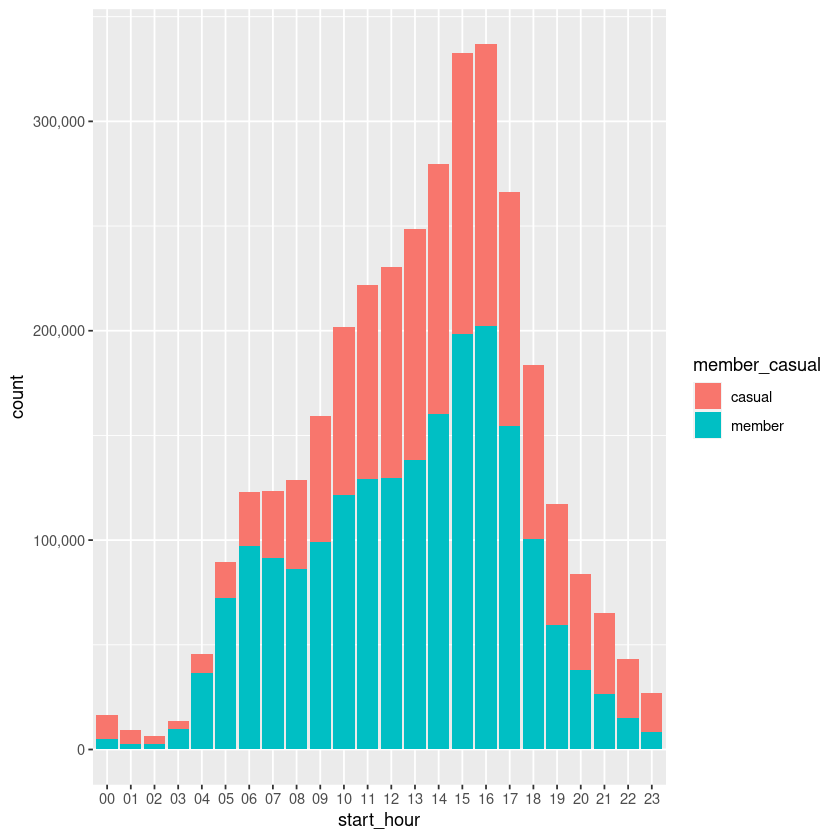

In [26]:
ggplot(df, aes(start_hour, fill=member_casual))+
  geom_bar()+
  scale_y_continuous(labels=comma)

Now let's plot the same comparison for each day of the week.

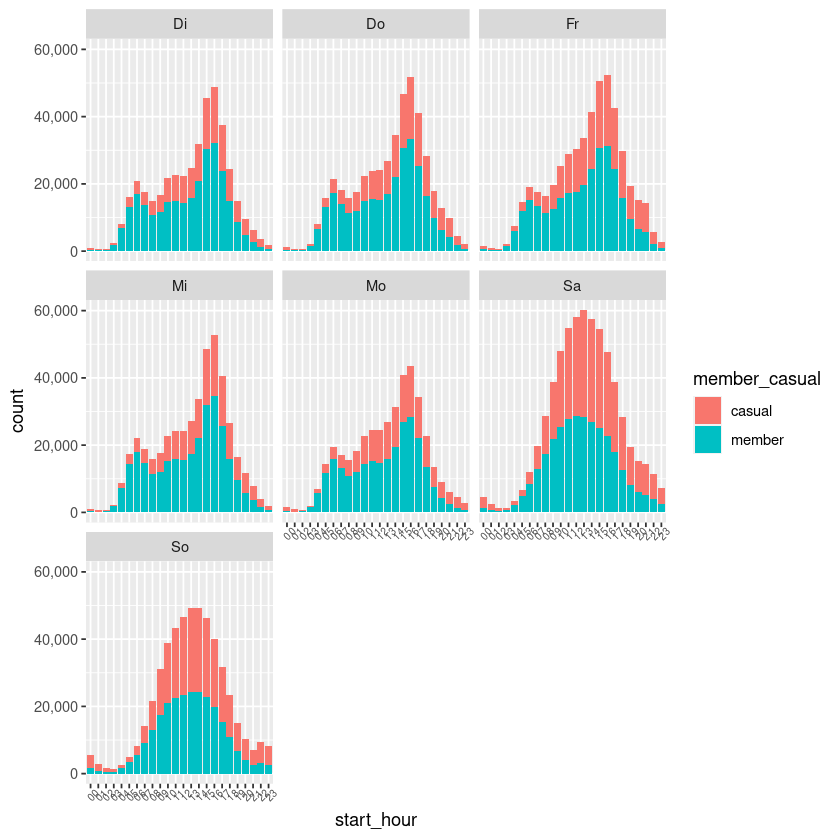

In [27]:
ggplot(df, aes(start_hour, fill=member_casual))+
  geom_bar()+
  facet_wrap(~weekday)+
  scale_y_continuous(labels=comma)+
  theme(axis.text.x = element_text(size=6, angle=45))

We can see that the number of casual riders is more on the weekends than on weekdays (where annual members are more).

To more comprehend the above analysis, let's divide the hours into morning, afternoon, and evening

In [29]:
df <- mutate(df, hour_of_the_day=ifelse(df$start_hour<12, "Morning",
                                        ifelse(df$start_hour>=12 & df$start_hour<19, "Afternoon", "Evening")))

In [30]:
hour_type_df <- df %>% 
  group_by(hour_of_the_day) %>%
  summarize(count=length(ride_id),
            percentage_of_total=(length(ride_id)/nrow(df))*100,
            members_count=sum(member_casual=="member"),
            members_percent=(sum(member_casual=="member")/length(ride_id))*100,
            casual_count=sum(member_casual=="casual"),
            casual_percent=(sum(member_casual=="casual")/length(ride_id))*100)
hour_type_df

hour_of_the_day,count,percentage_of_total,members_count,members_percent,casual_count,casual_percent
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
Afternoon,1878048,55.98917,1083508,57.69331,794540,42.30669
Evening,336656,10.03653,147912,43.93565,188744,56.06435
Morning,1139602,33.97430,753033,66.07860,386569,33.92140


Mornings had more number of annual riders whereas evening has more number of casual riders. However, afternoon had more number of total riders compared to mornings or evenings.

Let's plot the above table

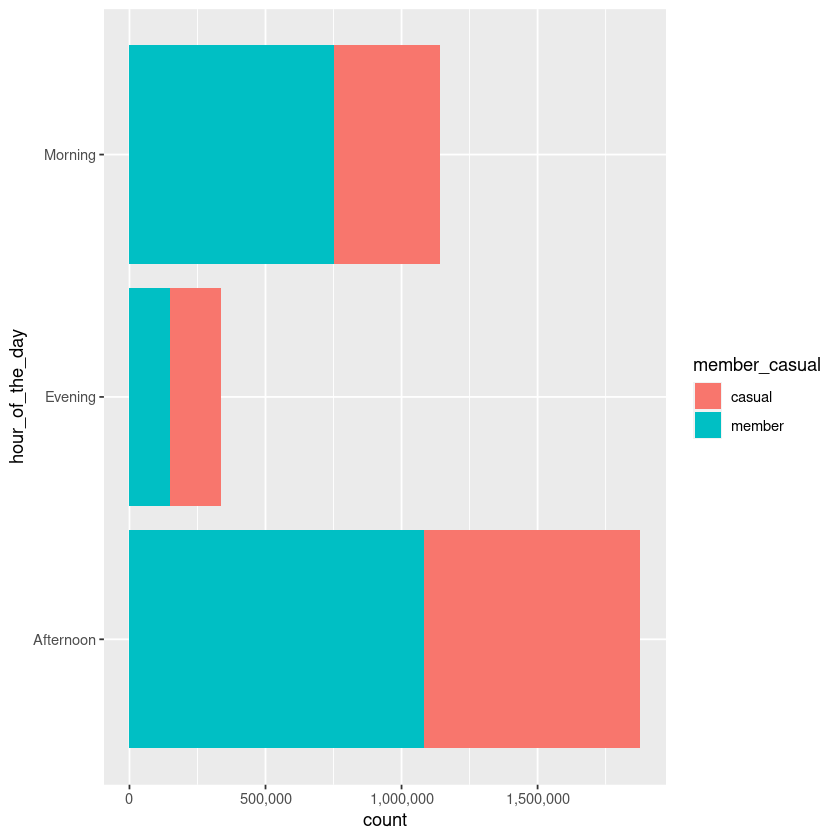

In [32]:
ggplot(df, aes(hour_of_the_day, fill=member_casual))+
  geom_bar()+
  #facet_wrap(~hour_of_the_day, scales = "free")+
  scale_y_continuous(labels=comma)+
  coord_flip()

**d) Let's check how number of riders vary per each week of the day**

In [33]:
df %>% 
  group_by(weekday) %>%
  summarize(count=length(ride_id),
            percentage_of_total=(length(ride_id)/nrow(df))*100,
            members_count=sum(member_casual=="member"),
            members_percent=(sum(member_casual=="member")/length(ride_id))*100,
            casual_count=sum(member_casual=="casual"),
            casual_percent=(sum(member_casual=="casual")/length(ride_id))*100)

weekday,count,percentage_of_total,members_count,members_percent,casual_count,casual_percent
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
Di,414775,12.36545,275452,66.40998,139323,33.59002
Do,448481,13.37031,290230,64.71400,158251,35.28600
Fr,492398,14.67958,295518,60.01608,196880,39.98392
Mi,447229,13.33298,295871,66.15649,151358,33.84351
Mo,404166,12.04917,258362,63.92472,145804,36.07528
Sa,634797,18.92484,312068,49.16028,322729,50.83972
So,512460,15.27768,256952,50.14089,255508,49.85911


Saturdays and Sundays had more casual riders than annual members. Members usually ride on the weekdays due to work.

Let's plot the above table.

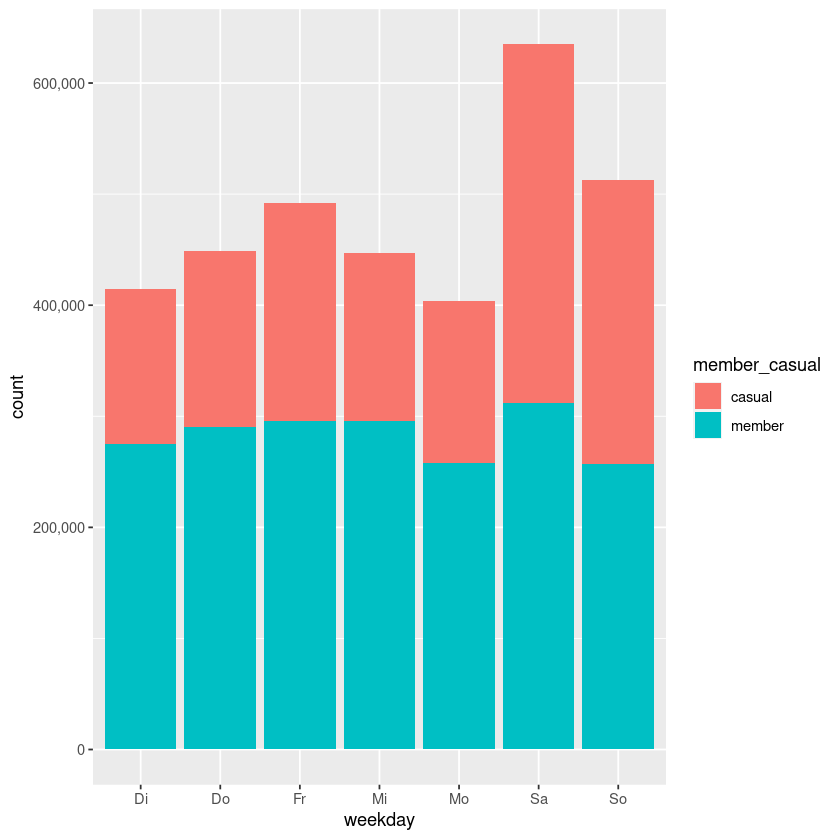

In [34]:
ggplot(df, aes(weekday, fill=member_casual))+
  geom_bar()+
  scale_y_continuous(labels=comma)

**e) Let's check what types of bikes do riders usually ride**

In [35]:
df %>% 
  group_by(rideable_type) %>%
  summarize(count=length(ride_id),
            percentage_of_total=(length(ride_id)/nrow(df))*100,
            members_count=sum(member_casual=="member"),
            members_percent=(sum(member_casual=="member")/length(ride_id))*100,
            casual_count=sum(member_casual=="casual"),
            casual_percent=(sum(member_casual=="casual")/length(ride_id))*100)

rideable_type,count,percentage_of_total,members_count,members_percent,casual_count,casual_percent
<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>
classic_bike,319311,9.519436,248731,77.89616,70580,22.10384
docked_bike,2554083,76.143411,1439492,56.36042,1114591,43.63958
electric_bike,480912,14.337153,296230,61.59755,184682,38.40245


It seems docked bikes are more preferred over classic and electric bikes. However, riders have also chosen classic and electric too. Maybe the company has more docked bikes.

Let's plot the above table but we'll also see how this trend works for each day.

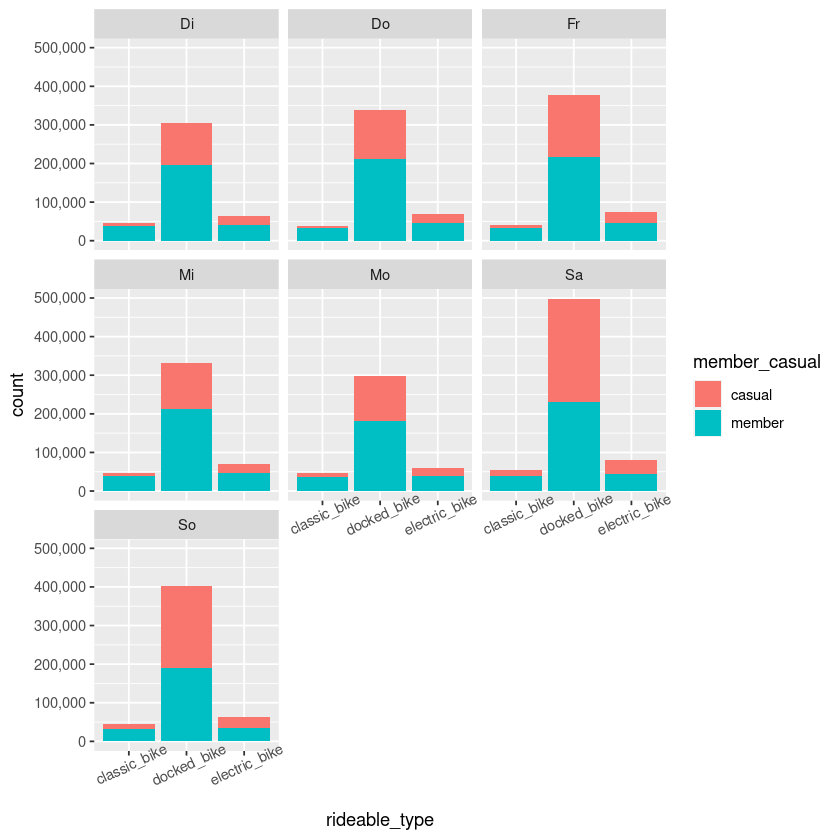

In [36]:
ggplot(df, aes(rideable_type, fill=member_casual))+
  geom_bar()+
  scale_y_continuous(labels=comma)+
  facet_wrap(~weekday)+
  theme(axis.text.x = element_text(angle=25))


**f) Let's consider riding_time feature now**

Let's print the summary of the `riding_time` variable to check if there are any anomalies.

In [37]:
summary(df$riding_time)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-29049.97      7.97     14.60     26.32     26.72  58720.03 

As can be seen, there are outliers. The minimum riding time is negative, which is unusual as time can't be negative. The maximum also seems too large (that is, the rider has taken the bike for approximately 37 days). To confirm that this is an outlier, let's check each quantile value.

Printing the values in each quantiles with 5% difference

In [38]:
quantiles <- quantile(df$riding_time, seq(0,1,by=0.05))
quantiles

0%            5%           10%           15%           20% 
-29049.966667      3.166667      4.583333      5.750000      6.850000 
          25%           30%           35%           40%           45% 
     7.966667      9.116667     10.333333     11.616667     13.033333 
          50%           55%           60%           65%           70% 
    14.600000     16.383333     18.400000     20.750000     23.500000 
          75%           80%           85%           90%           95% 
    26.716667     30.666667     36.466667     46.150000     73.250000 
         100% 
 58720.033333

It is clear that the maximum value was an outlier and hence it is unworthy of consideration.

Considering only the values in the 5-95% interval

In [39]:
new_df_without_outliers <- df %>% 
  filter(riding_time > as.numeric(quantiles['5%'])) %>% 
  filter(riding_time < as.numeric(quantiles['95%']))

final_df <- new_df_without_outliers

Now let's compare the riding_time with all the other features used before

**g) Let's start by checking the riding time of both members and casual riders**

In [40]:
final_df %>% 
  group_by(member_casual) %>% 
  summarize(mean=mean(riding_time),
            first_quarter=quantile(riding_time, 0.25),
            median=median(riding_time),
            third_quarter=quantile(riding_time, 0.75),
            IQR = third_quarter-first_quarter)

member_casual,mean,first_quarter,median,third_quarter,IQR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
casual,23.85597,11.433333,19.38333,31.56667,20.13333
member,15.52896,7.366667,12.25000,20.71667,13.35000


Let's plot the same and check for any trends.

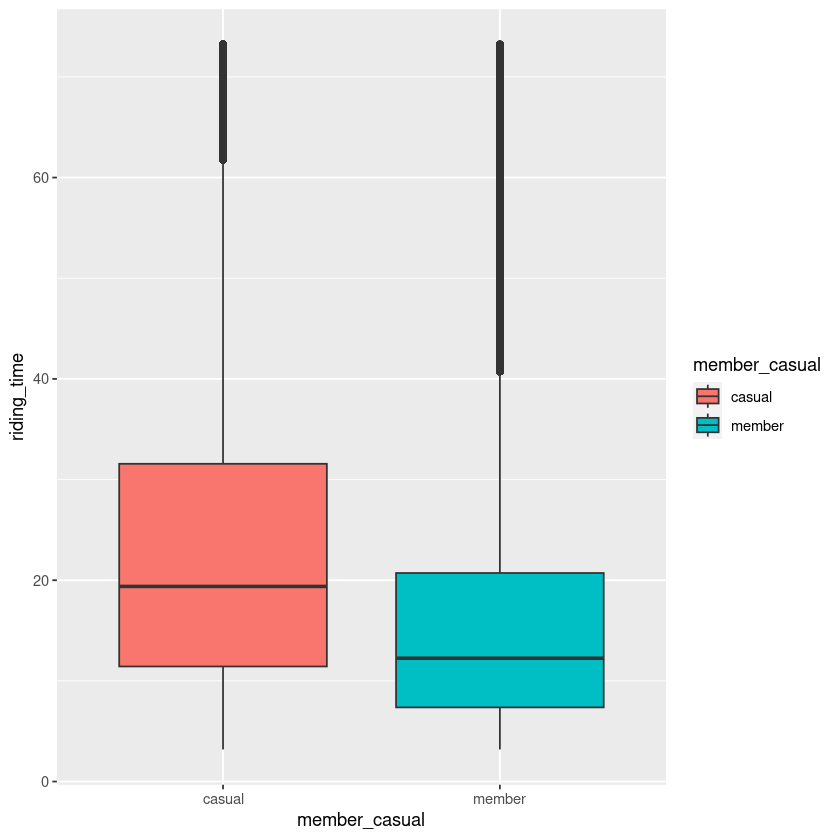

In [41]:
ggplot(final_df, aes(x=member_casual, y=riding_time, fill=member_casual))+
  geom_boxplot()

**h) Let's next check riding time of both members and casual riders for each of the week**

Since the riding time is continuous and any feature compared to it would be discrete, we can go with box plots.

In [42]:
final_df %>% 
  group_by(weekday) %>% 
  summarize(mean=mean(riding_time),
            first_quarter=quantile(riding_time, 0.25),
            median=median(riding_time),
            third_quarter=quantile(riding_time, 0.75),
            IQR = third_quarter-first_quarter)

weekday,mean,first_quarter,median,third_quarter,IQR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Di,17.31807,7.900000,13.26667,22.86667,14.96667
Do,17.33621,7.983333,13.38333,22.81667,14.83333
Fr,18.10196,8.366667,14.10000,23.93333,15.56667
Mi,17.21342,7.933333,13.28333,22.63333,14.70000
Mo,17.93789,7.983333,13.70000,23.93333,15.95000
Sa,20.97372,9.850000,16.93333,28.08333,18.23333
So,21.30110,9.783333,17.16667,28.70000,18.91667


Let's plot the same and check for any trends.

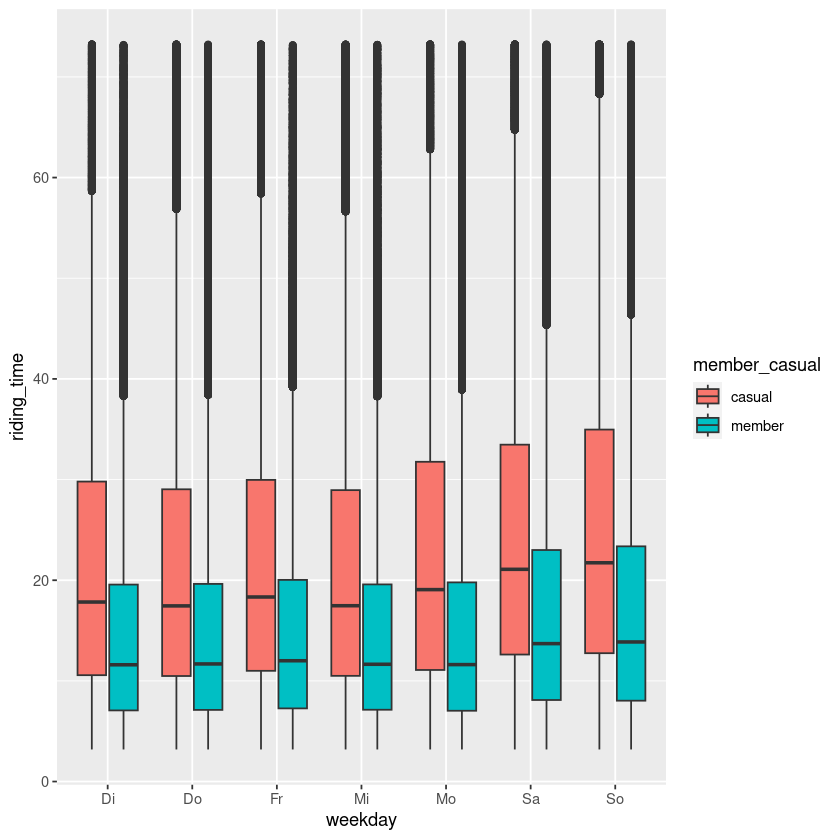

In [43]:
ggplot(final_df, aes(x=weekday, y=riding_time, fill=member_casual))+
  geom_boxplot()

It can be clearly seen that the casual riders spend more time riding than annual members. Let's see why this is the case in the next steps.

**i) Let's now check how these times vary for each month**

In [44]:
final_df %>% 
  group_by(year_month) %>% 
  summarize(mean=mean(riding_time),
            first_quarter=quantile(riding_time, 0.25),
            median=median(riding_time),
            third_quarter=quantile(riding_time, 0.75),
            IQR = third_quarter-first_quarter)

year_month,mean,first_quarter,median,third_quarter,IQR
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020 - 04 - Apr,19.78134,9.366667,16.450000,27.01667,17.65000
2020 - 05 - Mai,21.98135,10.750000,18.716667,29.46667,18.71667
2020 - 06 - Jun,21.13640,10.383333,17.500000,28.01667,17.63333
2020 - 07 - Jul,21.10097,10.083333,17.000000,27.98333,17.90000
2020 - 08 - Aug,19.81073,9.300000,15.683333,26.38333,17.08333
2020 - 09 - Sep,18.25314,8.366667,14.100000,24.06667,15.70000
2020 - 10 - Okt,16.27278,7.416667,12.266667,21.05000,13.63333
2020 - 11 - Nov,16.22684,7.150000,11.966667,21.06667,13.91667
2020 - 12 - Dez,14.05159,6.483333,10.466667,17.88333,11.40000


Let's plot the same and check for any trends.

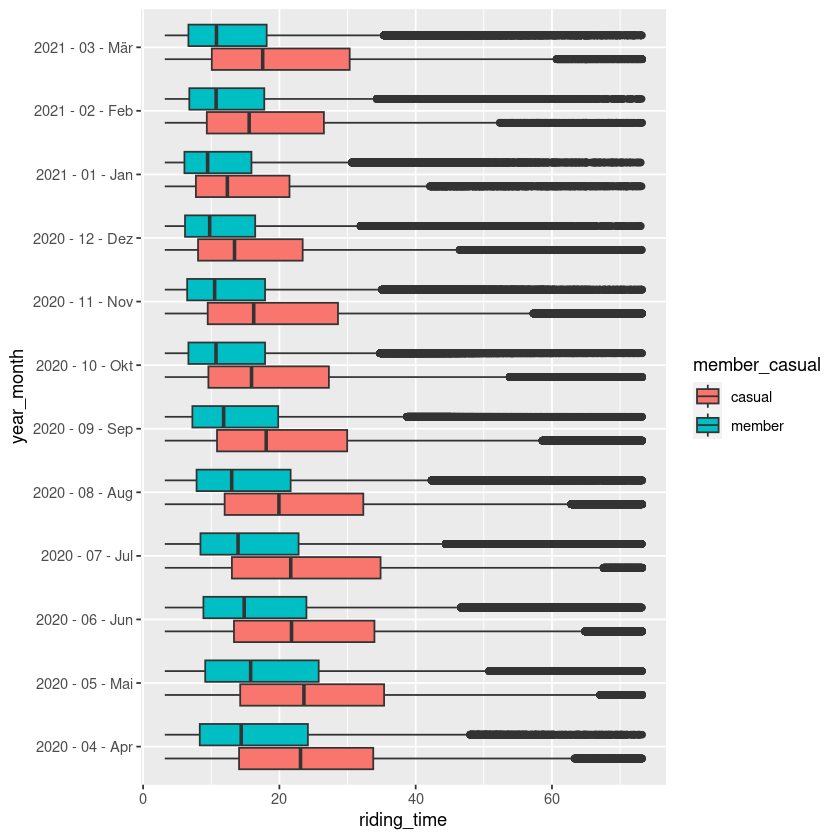

In [45]:
ggplot(final_df, aes(x=year_month, y=riding_time, fill=member_casual))+
  geom_boxplot()+
  coord_flip()

As the number of riders in the winter months was less, the same reflects in the riding time.

# Observations

**Annual Members vs Casual Riders**

According to the above analysis, let's see how members and casual riders differ:

1)  The population of the annual members is more than the casual riders, with 59% of the total riders in the last 12 months.

2)  The percentage of riders that own a bike is highest in July, August, and September. We can assume this rise due to the season (Summer to Fall transition)

3)  We can also observe a trend with a similar reason (due to the season of the year) that is the number of bikes owned is few in the peak winter season, that is, the months of November, December, January, and February.

4)  It is decisive that across all the months, the members were more in percent than casuals.

5)  As an average in 12 months, annual members seem to start their journey from early morning 6 am and increase throughout the day to hit the peak at 5 pm. This trend might be because most of the members use their bikes to commute to their work. As the typical corporate day ends around 5 pm, there is a peak at that hour.

6)  Also, as the day progresses, the casual riders start their journey for maybe recreational activities.

7)  If we scrutinize the start hour per day of the week, we find that the annual members are not as active on the weekends as they are on the weekdays. In contrast, casual riders are more active on the weekends. This trend proves that members usually use their bikes to commute to work.

8)  When later the hours of the day were classified into morning, afternoon, and evening, the visualization depicted that more members travel in the mornings and afternoons. In comparison, casual riders travel more in the afternoons and evenings.

9)  When the riding time of casuals and members is compared, causal riders have higher riding time than members. This trend again proves that members use bikes to work and park, reducing their riding time.

10) Another proof that members have a fixed route and use bikes for the same reason throughout the weekdays is when we plot the riding time against each day.

11) The members' box in the boxplot remains almost constant for all the weekdays and slightly increases on the weekends. This trend could be maybe they use their bikes for recreational purposes.

12) Also, as the number of riders was less in the peak winter times, the same reflects on the riding time. There were fewer riders in these months, so was the riding time.

**Changes required to convert casual riders to annual members:**

1)  Impose offers for annual members and not for casual riders.

2)  Increase the price of the bikes on weekends for casual riders.

3)  Place special offers for anyone who registers for the annual membership from November to February.

4)  Reduce the limit on the time duration or distance a casual rider can travel.

5)  Increase the surge for bikes for casual riders in the evenings. Annual members riding the bikes in the mid-night can avail themselves of free cafe or bar coupons.
